In [60]:
from functools import partial
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [10]:
def array_plot(arr, size, xoff=0, yoff=0, alpha=1, color=None, text=True, **kwargs):    
    # get coordinates
    x = np.arange(arr.shape[1])
    y = np.arange(arr.shape[0])
    xs, ys = np.meshgrid(x, y)
    xs = xs.astype(float)
    ys = ys.astype(float)
    xs += xoff
    ys += yoff
    xys = np.column_stack([xs.ravel(), ys.ravel()])
    
    # create gridlines
    for xy in xys:
        rect = plt.Rectangle(xy - 0.5, 1, 1, color=color, **kwargs)
        plt.gca().add_patch(rect)
        
        lw = 3 * size / 10
        border = plt.Rectangle(xy - 0.5, 1, 1, linewidth=lw, facecolor='none', edgecolor='k', alpha=alpha, **kwargs)
        plt.gca().add_patch(border)
    
    # display array values
    if text:
        for (x, y), val in zip(xys, arr.ravel()):
            s = str(val)
            x = x - 0.1 * len(s) - 0.01
            y = y + 0.15
            plt.text(x, y, s=s, fontsize=size * 1.5, fontweight=100, alpha=alpha)

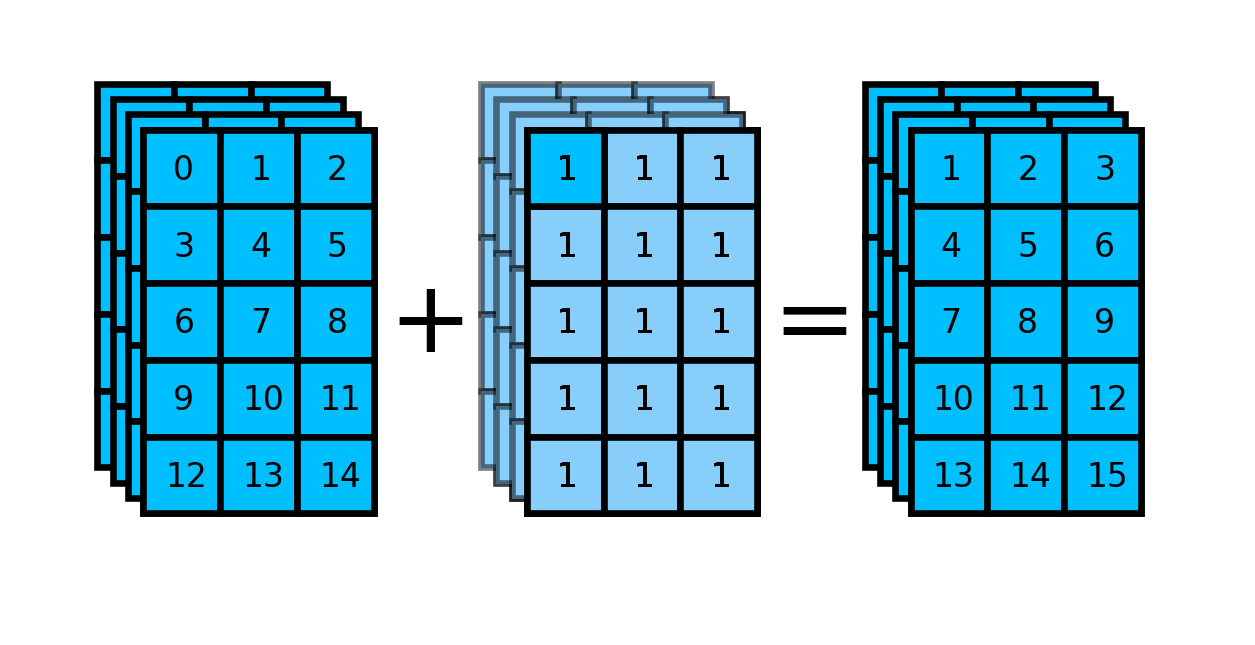

In [57]:
darkcolor = 'deepskyblue'
lightcolor = 'lightskyblue'

figsize = 22
max_width = 14
max_height = 6

plt.figure(figsize=(figsize, figsize))
arr_plt = partial(array_plot, size=figsize)

canvas = np.zeros((max_height + 2, max_width + 2))
plt.imshow(canvas, alpha=0, aspect='equal')
plt.axis('off')

def plot_ndim(arr, depth, color, xo, yo):
    dim_plt = partial(arr_plt, color=color)
    for i in range(depth):
        xoff = xo + i * 0.2
        yoff = yo + i * 0.2
        dim_plt(arr, xoff=xoff, yoff=yoff, text=False)
    dim_plt(arr, xoff=xoff, yoff=yoff)


### RANGE 3D-GRID
height, width, depth = 5, 3, 4
rng = np.arange(height * width).reshape(height, width)
plot_ndim(rng, depth, darkcolor, 1, 1)


### ONES SCALAR --> ONES ARRAY
scalar = 1
arr = np.reshape(scalar, (1, 1))
for i in range(depth):  # align to front layer of 3d array
    xoff = 6 + i * 0.2
    yoff = 1 + i * 0.2
    
broadcast_plt = partial(arr_plt, color=lightcolor)
scalar_plt = partial(broadcast_plt, np.reshape(scalar, (1, 1)), xoff=xoff, yoff=yoff, color=darkcolor)

scalar_plt(linestyle='--')
plt.text(4.3, 4, s='+', fontsize=100)
# plt.savefig(f'broadcasting', bbox_inches='tight')
    
# Expand Down
stacker = arr.copy()
for h in range(height):
    broadcast_plt(arr, xoff=xoff, yoff=yoff, alpha=0.5)
    arr = np.vstack((arr, stacker))
    scalar_plt()
#     plt.savefig(f'broadcasting_{h}', bbox_inches='tight')

# Expand Across
arr = arr[:-1]  # undo extra stack
stacker = arr.copy()  
for w in range(width):
    broadcast_plt(arr, xoff=xoff, yoff=yoff, alpha=0.5)
    arr = np.hstack((arr, stacker))
    scalar_plt()
#     plt.savefig(f'broadcasting_{h}_{w}', bbox_inches='tight')

# Expand Depth
arr = arr[:,:-1]  # undo extra stack
for d in range(depth):
    for i in reversed(range(d+1)):
        xoff = 6 - i * 0.2 + (w + 1) * 0.2
        yoff = 1 - i * 0.2 + (w + 1) * 0.2
        broadcast_plt(arr, xoff=xoff, yoff=yoff, text=False, alpha=0.5)
        if not i:
            broadcast_plt(arr, xoff=xoff, yoff=yoff)
            scalar_plt()
#     plt.savefig(f'broadcasting_{h}_{w}_{d}', bbox_inches='tight')


# BROADCAST RESULT
plt.text(9.3, 4, s='=', fontsize=100)
plot_ndim(rng + scalar, depth, darkcolor, 11, 1)
# plt.savefig(f'broadcasting_{h}_{w}_{d}_eq.png', bbox_inches='tight')

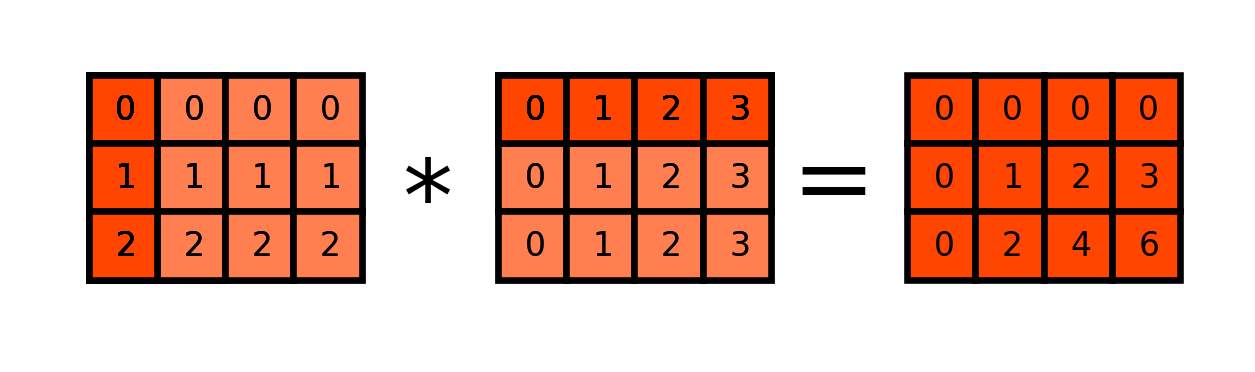

In [142]:
darkcolor = 'orangered'
lightcolor = 'coral'

figsize = 22
max_width = 16
max_height = 3

plt.figure(figsize=(figsize, figsize))
arr_plt = partial(array_plot, size=figsize)

canvas = np.zeros((max_height + 2, max_width + 2))
plt.imshow(canvas, alpha=0, aspect='equal')
plt.axis('off')

def plot_ndim(arr, color, xo, yo):
    dim_plt = partial(arr_plt, color=color)
    dim_plt(arr, xoff=xo, yoff=yo)


### COLUMN & ROW
height, width = 3, 4
col = np.arange(height)[:,np.newaxis]
row = np.arange(width)[np.newaxis,:]
# plot_ndim(col, darkcolor, 1, 1)
# plot_ndim(row, darkcolor, 7, 1)
    
broadcast_plt = partial(arr_plt, color=lightcolor, yoff=1)
col_plt = partial(broadcast_plt, col, xoff=1, color=darkcolor)
row_plt = partial(broadcast_plt, row, xoff=7, color=darkcolor)

plt.text(5.1, 2.8, s='*', fontsize=100)

col_plt()
row_plt()
# plt.savefig(f'broadcasting', bbox_inches='tight')

# Expand Column Across
arr = col.copy()
stacker = col.copy()  
for w in range(width):
    broadcast_plt(arr, xoff=1, alpha=0.5)
    arr = np.hstack((arr, stacker))
    col_plt()
#     plt.savefig(f'broadcasting_{w}', bbox_inches='tight')
broadcast_plt(arr[:,:-1], xoff=1)
col_plt()


# Expand Row Down
arr = row.copy()
stacker = row.copy()
for h in range(height):
    broadcast_plt(arr, xoff=7, alpha=0.5)
    arr = np.vstack((arr, stacker))
    row_plt()
#     plt.savefig(f'broadcasting_{w}_{h}', bbox_inches='tight')
broadcast_plt(arr[:-1], xoff=7)
row_plt()
# plt.savefig(f'broadcasting_{w}_{h}_d.png', bbox_inches='tight')

# BROADCAST RESULT
plt.text(10.8, 2.5, s='=', fontsize=100)
plot_ndim(row * col, darkcolor, 13, 1)
# plt.savefig(f'broadcasting_{w}_{h}_eq.png', bbox_inches='tight')

In [146]:
cwd = Path.cwd()
paths = sorted(p for p in cwd.iterdir() if 'png' in p.suffix)

imgs = [Image.open(p) for p in paths]
for _ in range(2):
    imgs.insert(0, imgs[0])  # make start last longer
for _ in range(6):
    imgs.append(imgs[-1])  # make end last longest
    
imgs.extend(imgs[::-1])  # make it loop back from end to start
imgs[0].save('broadcasting.gif', save_all=True, append_images=imgs, duration=240, loop=0)